# Aula 2 - Fastai

## *Exemplo Cats Vs Dogs*

In [ ]:
# catsxdogs - export(repositorio) - app - interface - script(vsc) - huggingface
# mamba
# gradio API

* ### Criando, treinando e exportando o modelo

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [9]:
def is_cat(x): return x[0].isupper()

In [10]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func = is_cat,
    item_tfms=Resize(192))

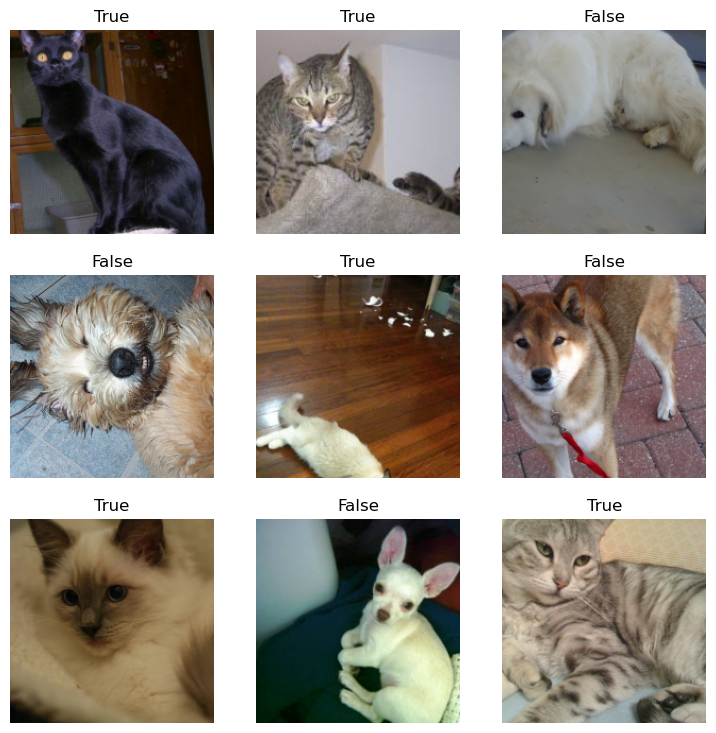

In [12]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\nebia\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nebia\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.199019,0.055444,0.023004,04:20


epoch,train_loss,valid_loss,error_rate,time
0,0.081361,0.020807,0.006766,06:07
1,0.040813,0.038304,0.015562,06:07
2,0.023767,0.024792,0.009472,06:02


In [13]:
learn.export('model_catsVSdogs.pkl')

* ### Baixando e aplicando o modelo criado

In [14]:
#|default_exp app

In [20]:
#|export
!pip install -q gradio
import gradio as gr

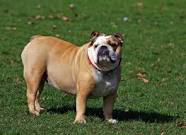

In [22]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [25]:
#|export
learn = load_learner('model_catsVSdogs.pkl')

In [27]:
# %time - tempo para predição

%time learn.predict(im)

CPU times: total: 188 ms
Wall time: 42.9 ms


('False', tensor(0), tensor([9.9912e-01, 8.8203e-04]))

In [30]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [31]:
classify_image(im)

{'Dog': 0.999117910861969, 'Cat': 0.0008820266230031848}

* ### Criando o gradio

In [35]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


* ### Exportando para o python

In [43]:
import nbdev

In [45]:
nbdev.export.nb_export('Example_catsVSdogs.ipynb', 'Example_catsVSdogs')
print('Exportação concluída !')

Exportação concluída !
